In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from perceptron import Perceptron
from adaline import Adaline
from adalineSGD import AdalineSGD

In [32]:
data = pd.read_csv(r"C:\Python\ML\Perceptrons\iris\iris.data", header=None) 
# sepal length - sepal width - petal length - petal width

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
data.keys()

Index([0, 1, 2, 3, 4], dtype='int64')

In [35]:
# Extract sepal - and petal lengths
sepal_petal_lengths = data.iloc[0:100, [0, 2]].values
# Extract class label, used later to fit to a percetron
iris_labels = data.iloc[0:100, 4].values
# Change labeles into integers: 0 - Iris-setosa, 1 - Iris-versicolour
iris_labels = np.where(iris_labels == 'Iris-setosa', 0, 1)

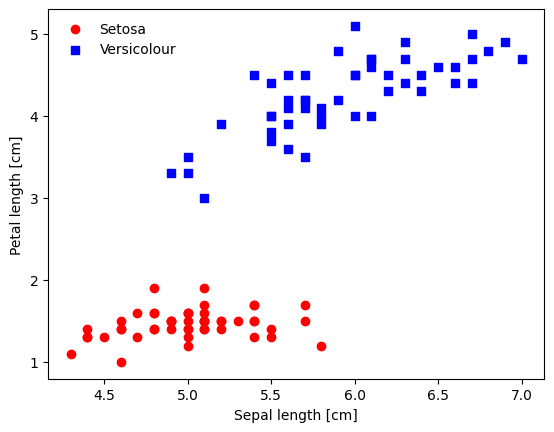

In [36]:
plt.scatter(sepal_petal_lengths[:50, 0], sepal_petal_lengths[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(sepal_petal_lengths[50:100, 0], sepal_petal_lengths[50:100, 1],
            color='blue', marker='s', label='Versicolour')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(['Setosa', 'Versicolour'], frameon=False)

In [37]:
iris_perceptron = Perceptron(learning_rate=0.1, n_iters=10)
iris_perceptron.fit(sepal_petal_lengths, iris_labels)

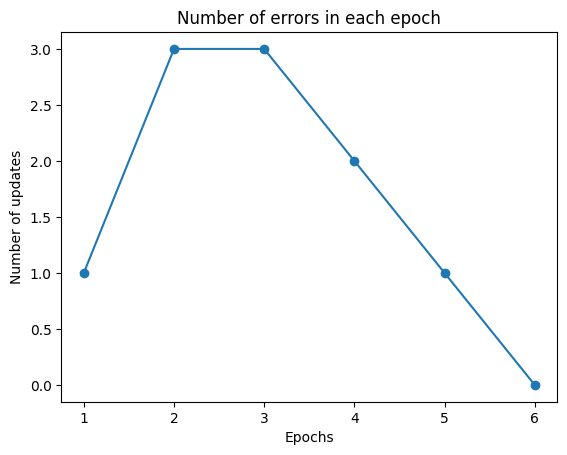

In [38]:
plt.plot(range(1, len(iris_perceptron.errors) + 1),
iris_perceptron.errors, marker='o')
plt.title('Number of errors in each epoch')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [39]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f'Class {cl}',
            edgecolor='black')

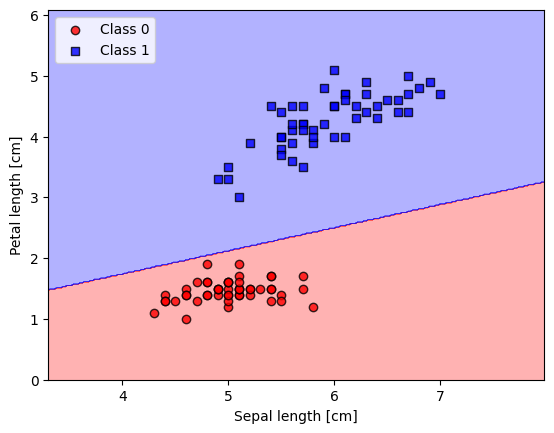

In [40]:
plot_decision_regions(sepal_petal_lengths, iris_labels, classifier=iris_perceptron)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

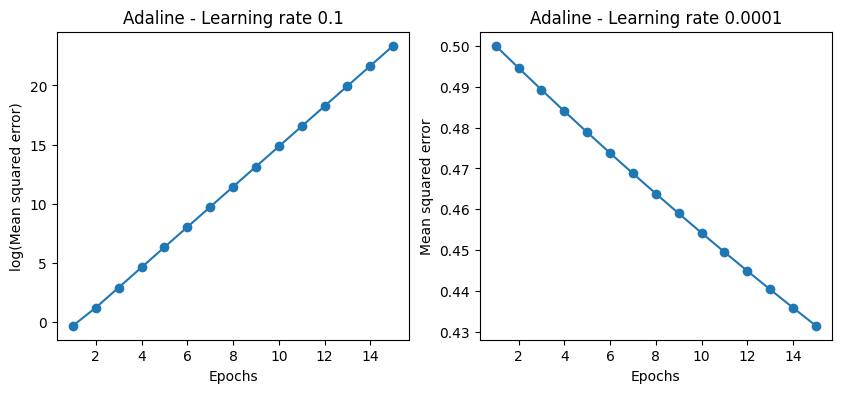

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = Adaline(n_iters=15, learning_rate=0.1)
ada1.fit(sepal_petal_lengths, iris_labels)
ax[0].plot(range(1, len(ada1.losses) + 1),
           np.log10(ada1.losses), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = Adaline(n_iters=15, learning_rate=0.0001)
ada2.fit(sepal_petal_lengths, iris_labels)
ax[1].plot(range(1, len(ada2.losses) + 1),
           ada2.losses, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()
X = sepal_petal_lengths
y = iris_labels

In [42]:
# Standarization
X_std = np.copy(X)
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

In [43]:
ada_gd = Adaline(n_iters=20, learning_rate=0.5)
ada_gd.fit(X_std, y)

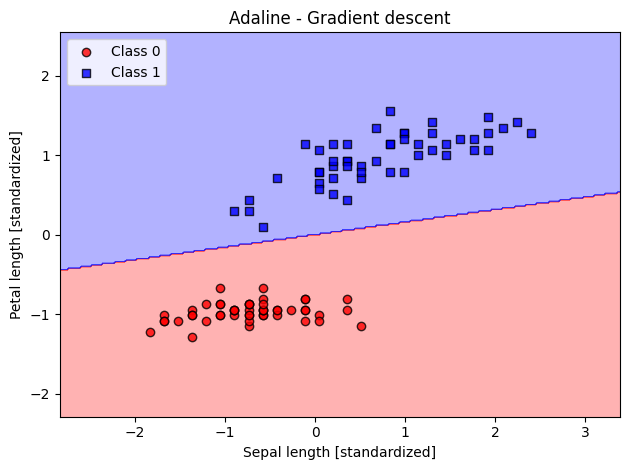

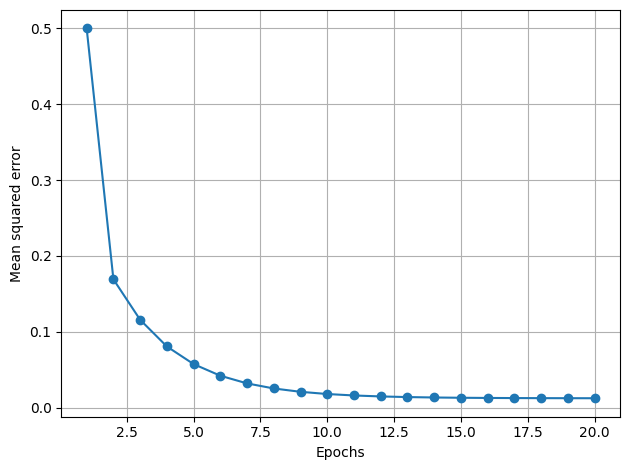

In [44]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.losses) + 1),
         ada_gd.losses, marker='o')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

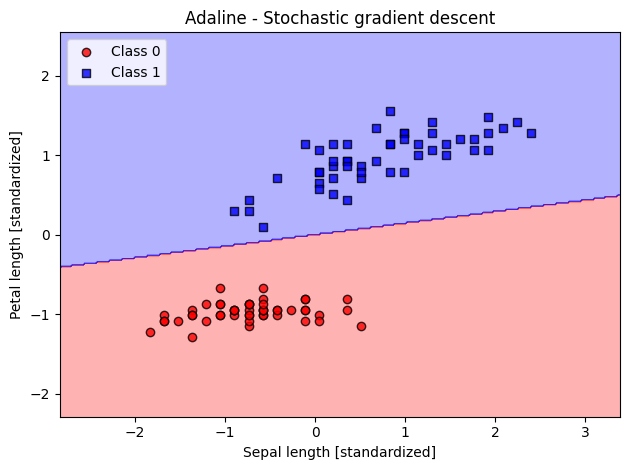

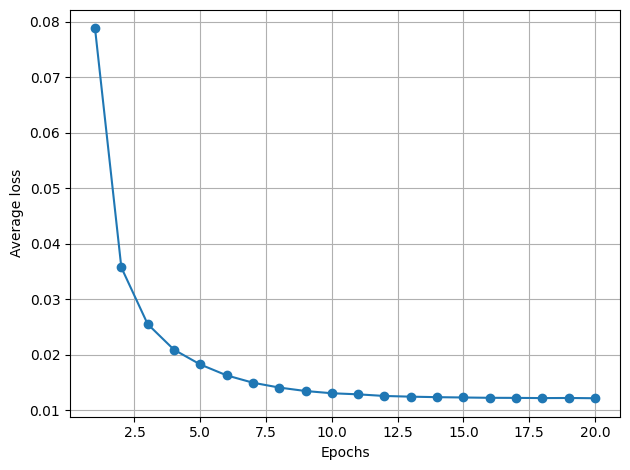

In [45]:
ada_sgd = AdalineSGD(n_iters=20, learning_rate=0.01)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.cost) + 1), ada_sgd.cost,
         marker='o')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()